# process raw bam data

In [1]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [2]:
import re
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import numpy as np
import pandas as pd
import pathlib

In [3]:
import nr_utils

In [4]:
import bam

In [5]:
bam_data_dir = "/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData"
# bam_data_dir = "/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/"
reg = re.compile(r'raw|psi4|hFFI')                    # Compile the regex
simulations = list(filter(lambda x: not reg.search(x), glob.glob(os.path.join(bam_data_dir, "*/**/*.bbh")))) 

In [6]:
simulations = list(map(pathlib.Path, simulations))

In [7]:
[s.parent for s in simulations]

[]

In [8]:
# bam = bam.BAMSimulation(simulations_bbh_files[0].parent)

# bam = bam.BAMSimulation('/Users/sebastian.khan/Desktop/tmp_data/q10S0/q10c25e1c_T_80_320')
# bam = bam.BAMSimulation('/Users/sebastian.khan/Desktop/tmp_data/q10S0/q10c25e205_T_80_320')
bam0 = bam.BAMSimulation('/Users/sebastian.khan/Desktop/tmp_data/q8S0/q8a0a0_T_112_588n768/')
# bam1 = bam.BAMSimulation('/Users/sebastian.khan/Desktop/tmp_data/q8S0/q8a0a0_T_80_420/')
# bam1 = bam.BAMSimulation('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_96_504n512')


# bam0 = bam.BAMSimulation('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_120/q18a0a0c025_120')
# bam1 = bam.BAMSimulation('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q18a0a0c025_144/q18a0a0c025_144')

# bam0 = bam.BAMSimulation('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_112_448')
# bam1 = bam.BAMSimulation('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q4a0a0/q4a0_T_96_384')


# PosixPath('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_112_588n768'),
#  PosixPath('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_80_420'),
#  PosixPath('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0_T_96_504n512'),
#  PosixPath('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0c035_T_80_420'),
#  PosixPath('/Volumes/ancient/get-nr-data/bam/data/gluster/gw-data/NR_data/backup-minion-data/ReducedData/q8S0/q8a0a0c05_T_80_420'

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [9]:
# !cat /Users/sebastian.khan/Desktop/tmp_data/q8S0/q8a0a0_T_112_588n768/q8a0a0_T_112_588n768.bbh

In [10]:
bam0.par_file

PosixPath('/Users/sebastian.khan/Desktop/tmp_data/q8S0/q8a0a0_T_112_588n768/q8a0a0_T_112_588n768.bbh')

In [12]:
bam0.EstStartAngFreq22

0.1601262371297741

In [119]:
psi4_t, psi4 = bam0.load_psi4(2, 2, return_3col=False)
psi4_om = IUS(psi4_t, np.unwrap(np.angle(psi4))).derivative()(psi4_t)

In [120]:
plt.plot(psi4_t, psi4_om)
plt.ylim(-0.2, 0.2)
plt.axhline(bam0.EstStartAngFreq22)
plt.axhline(bam0.EstStartAngFreq22*0.75, c='k')

In [121]:
from scipy.signal import savgol_filter

In [122]:
len(psi4_om_filtered)

25507

In [151]:
def get_window_length(dt, width):
    """
    return window length with savgol filter in terms of number of samples
    computed from the time spacing (dt) and the width in units of M
    desired.
    """
    return int(width / dt)

In [152]:
window_length = get_window_length(dt=psi4_t[1]-psi4_t[0], width=25)
window_length

547

In [153]:
psi4_om_filtered = savgol_filter(psi4_om, window_length, 2)

In [154]:
plt.figure(figsize=(14,8), dpi=100)
plt.plot(psi4_t, psi4_om)
plt.plot(psi4_t, psi4_om_filtered, ls='--')
plt.ylim(-0.2, 0.6)
# plt.ylim(-0.2, 2)

(-0.2, 0.6)

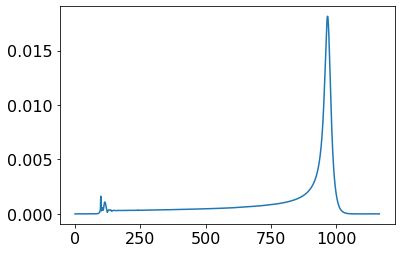

In [18]:
plt.plot(psi4_t, np.abs(psi4))

In [159]:
bam0.extraction_radii

{'r1': 50, 'r2': 60, 'r3': 70, 'r4': 80, 'r5': 90, 'r6': 100}

In [166]:
np.argmax(np.abs(p_a))

4376

In [168]:
np.max(np.abs(p_a))

199.9969

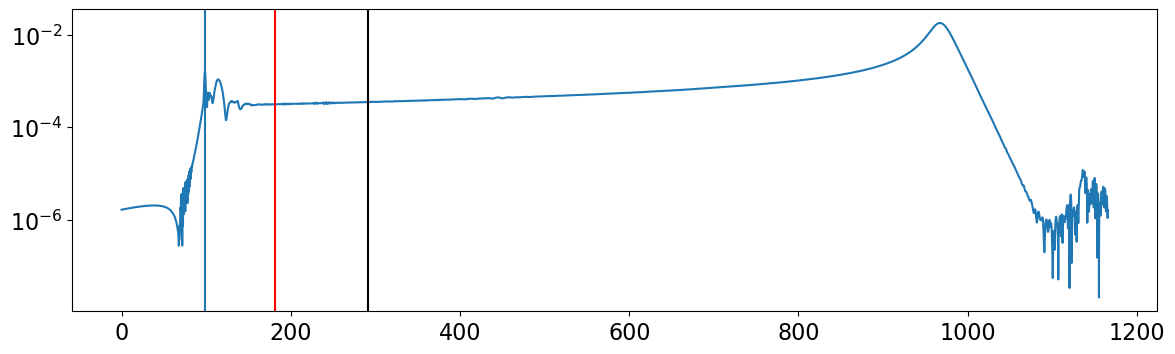

In [182]:
# split waveform in half and look for a peak in the first (junk)
# and second (meger) for peaks.

# the junk radiation, almost by definition will be the first non-zero
# data of psi4. so depending on the extraction radius we will
# known when the start of the junk radiation is.

# so then we take a conservation + 100M and use that data to find peak junk

# first_times = bam0.largest_extraction_radius_value + 100
first_times = bam0.duration/4
mask = bam0.psi4_times < first_times
t_a = bam0.psi4_times[mask]
p_a = psi4[mask]

idx_a = np.argmax(np.abs(p_a))

plt.figure(figsize=(14,4), dpi=100)
plt.plot(psi4_t, np.abs(psi4))
plt.axvline(t_a[idx_a])
plt.axvline(t_a[idx_a]+83, c='r')
plt.axvline(first_times, c='k')

# plt.axvline(100)
# plt.xlim(0, 250)
plt.yscale('log')

# find meger peak time

# find junk radiation peak time

# estimate end of junk radiation

In [ ]:
bam0.duration

In [ ]:
bam0.times

In [19]:
t, s = bam0.load_strain(2, 2)

In [23]:
psi4_t

array([0.000000e+00, 4.570312e-02, 9.140625e-02, ..., 1.165612e+03,
       1.165658e+03, 1.165704e+03])

In [24]:
t

array([0.000000e+00, 4.500000e-02, 9.000000e-02, ..., 1.147680e+03,
       1.147725e+03, 1.147770e+03])

In [17]:
t.shape

(25507,)

In [18]:
psi4_t.shape

(25507,)

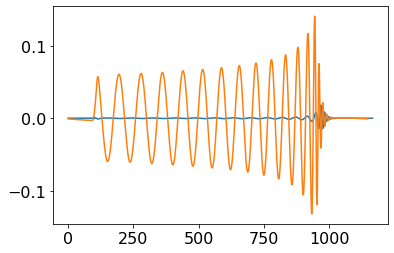

In [19]:
plt.plot(psi4_t, np.real(psi4))
plt.plot(t, np.real(s))

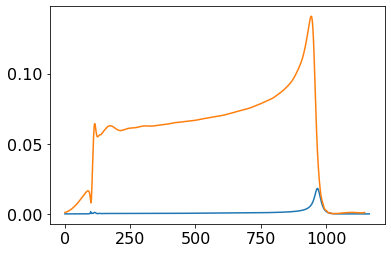

In [20]:
plt.plot(psi4_t, np.abs(psi4))
plt.plot(t, np.abs(s))

In [21]:
bam0.primary_mass

0.888889

In [22]:
bam0.total_mass

1.0

In [23]:
bam0.mass_ratio

8.000009000009

In [24]:
bam0.secondary_mass

0.111111

In [25]:
bam0.mass1

0.111111

In [26]:
bam0.mass2

0.888889

In [27]:
bam0.mass1_is_primary

False

In [28]:
bam0.mass2_is_primary

True

In [29]:
bam0.extracted_simulation_name

'q8a0a0_T_112_588n768'

In [30]:
bam0.simulation_name

'q8a0a0_T_112_588n768'

In [31]:
bam0.initial_bh_spin2z

0

In [32]:
bam0.largest_extraction_radius

'r6'

In [33]:
bam1.largest_extraction_radius

'r6'

In [36]:
bam1.sections.keys()

dict_keys(['metadata', 'body-data'])

In [66]:
lms = [(2,2),(2,1),(3,3),(3,2),(4,4),(4,3),(5,5),(5,4)]
p0={}
# p1={}
for l,m in lms:
    p0[l,m]={}
    # p1[l,m]={}
    # p0[l,m]['t'], p0[l,m][l,m]=bam0.load_psi4(l,m, return_3col=False)
    # p1[l,m]['t'], p1[l,m][l,m]=bam1.load_psi4(l,m, return_3col=False)
    p0[l,m]['t'], p0[l,m][l,m]=bam0.load_strain(l,m, safety_factor=0.3)
    # p1[l,m]['t'], p1[l,m][l,m]=bam1.load_strain(l,m)

In [67]:
# all times agree
for i, (l,m) in enumerate(lms):
    if i == 0:
        continue
    lm0=lms[0]
    np.testing.assert_array_equal(p0[lm0[0],lm0[1]]['t'], p0[l,m]['t'])

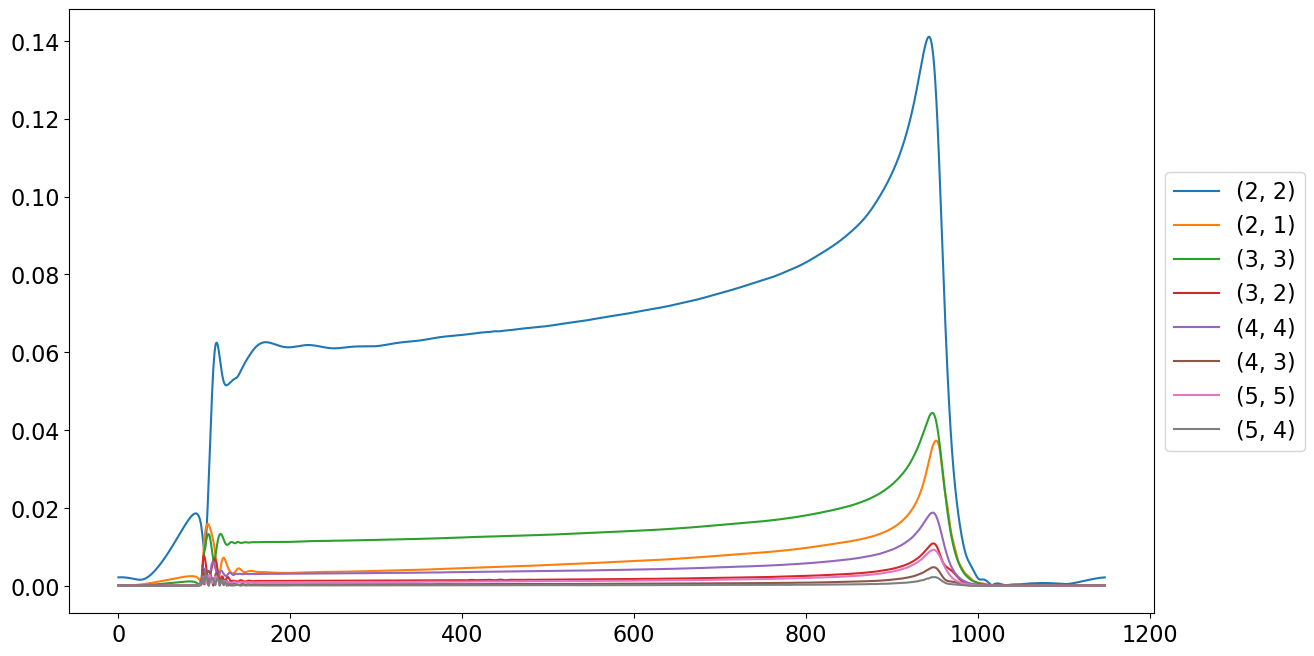

In [68]:
plt.figure(figsize=(14, 8), dpi=100)
for i, (l,m) in enumerate(lms):
    plt.plot(p0[l,m]['t'], np.abs(p0[l,m][l,m]), label=f'{l,m}', c=f"C{i}")
    # plt.plot(p1[l,m]['t'], np.abs(p1[l,m][l,m]), label=f'{l,m}', c=f"C{i}", ls='--')
    # plt.plot(p0[l,m][:,0], np.abs(p0[l,m][:,1]-1.j*p0[l,m][:,2]), label=f'{l,m}', c=f"C{i}")
    # plt.plot(p1[l,m][:,0], np.abs(p1[l,m][:,1]-1.j*p1[l,m][:,2]), label=f'{l,m}', ls='--', c=f"C{i}")
# plt.xlim(800, 1200)
# plt.xlim(2100, 2400)
# plt.title(f"{bam0.simulation_name} and {bam1.simulation_name}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.yscale('log')

# comparison with sxs

In [83]:
sxs_list=[
    # '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5',
    # '/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res3.h5'
    '/Users/sebastian.khan/personal/data/SXS_BBH_0063_Res5.h5',
]


In [84]:
nrls={}

for nrfile in sxs_list:
    simname = nrfile.split('/')[-1].split('.h5')[0]
    nrls[simname] = {}
    for l, m in lms:
        nrls[simname][l,m] = nr_utils.NRLoader(handler='nr_hdf5', nr_hdf5_filename=nrfile, dt=0.1, safety_factor=0.5, ell=l, mm=m)

In [85]:
nrls['SXS_BBH_0063_Res5'].keys()

dict_keys([(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (4, 3), (5, 5), (5, 4)])

In [86]:
nrls['SXS_BBH_0063_Res5'][2,1].times

array([-5686.11862652, -5686.01862652, -5685.91862652, ...,
         475.7813735 ,   475.8813735 ,   475.9813735 ])

In [87]:
nrls['SXS_BBH_0063_Res5'][2,1].strain

array([-2.15144626e-03-2.40465870e-03j, -2.14678623e-03-2.40886416e-03j,
       -2.14212110e-03-2.41305791e-03j, ...,
       -1.19892756e-07+6.32506666e-08j, -1.17607082e-07+6.04147755e-08j,
       -1.15293913e-07+5.75611283e-08j])

In [88]:
def h_to_psi4(t, h):
    psi4_real = IUS(t, h.real).derivative(n=2)(t)
    psi4_imag = IUS(t, h.imag).derivative(n=2)(t)
    return psi4_real-1.j*psi4_imag

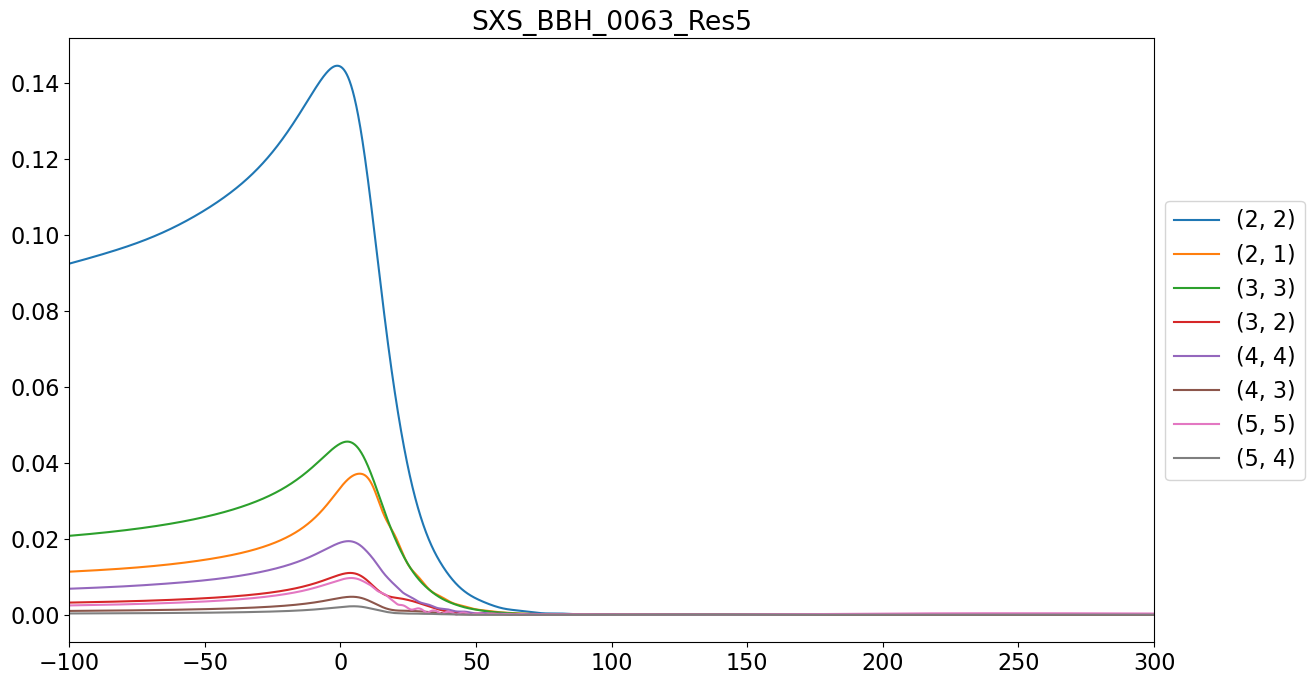

In [89]:
plt.figure(figsize=(14, 8), dpi=100)
for i, (l,m) in enumerate(lms):
    plt.plot(nrls['SXS_BBH_0063_Res5'][l,m].times, np.abs(nrls['SXS_BBH_0063_Res5'][l,m].strain), label=f'{l,m}', c=f"C{i}")
    # plt.plot(nrls['SXS_BBH_0063_Res5'][l,m].times, np.abs(h_to_psi4(nrls['SXS_BBH_0063_Res5'][l,m].times, nrls['SXS_BBH_0063_Res5'][l,m].strain)), label=f'{l,m}', c=f"C{i}")
    # plt.plot(p1[l,m][:,0], np.abs(p1[l,m][:,1]-1.j*p1[l,m][:,2]), label=f'{l,m}', ls='--', c=f"C{i}")
plt.xlim(-100, 300)
plt.title('SXS_BBH_0063_Res5')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.yscale('log')

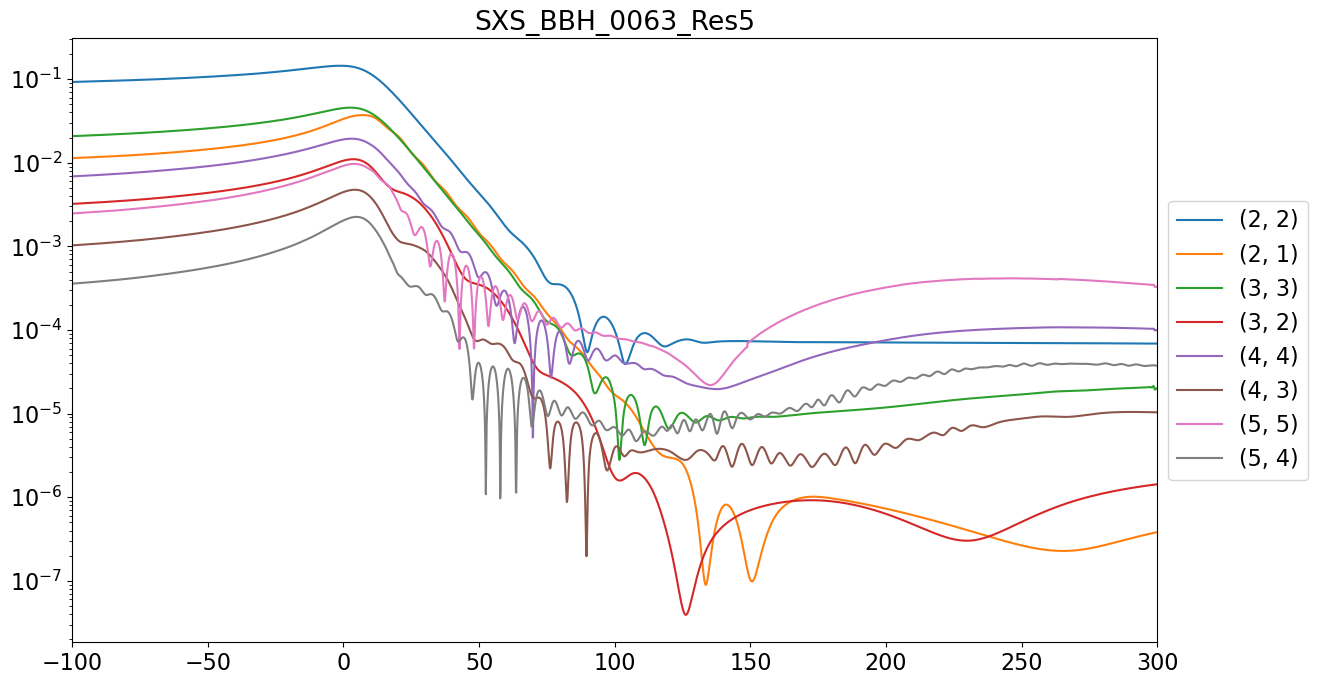

In [94]:
plt.figure(figsize=(14, 8), dpi=100)
for i, (l,m) in enumerate(lms):
    plt.plot(nrls['SXS_BBH_0063_Res5'][l,m].times, np.abs(nrls['SXS_BBH_0063_Res5'][l,m].strain), label=f'{l,m}', c=f"C{i}")
    # plt.plot(nrls['SXS_BBH_0063_Res5'][l,m].times, np.abs(h_to_psi4(nrls['SXS_BBH_0063_Res5'][l,m].times, nrls['SXS_BBH_0063_Res5'][l,m].strain)), label=f'{l,m}', c=f"C{i}")
    # plt.plot(p1[l,m][:,0], np.abs(p1[l,m][:,1]-1.j*p1[l,m][:,2]), label=f'{l,m}', ls='--', c=f"C{i}")
plt.xlim(-100, 300)
plt.title('SXS_BBH_0063_Res5')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yscale('log')

In [90]:
p0[l,m][l,m].shape

(25507,)

In [91]:
p0[l,m]['t'][2189]

98.50499999979364

In [92]:
np.where(p0[l,m]['t'] > 200)[0][0]

4445

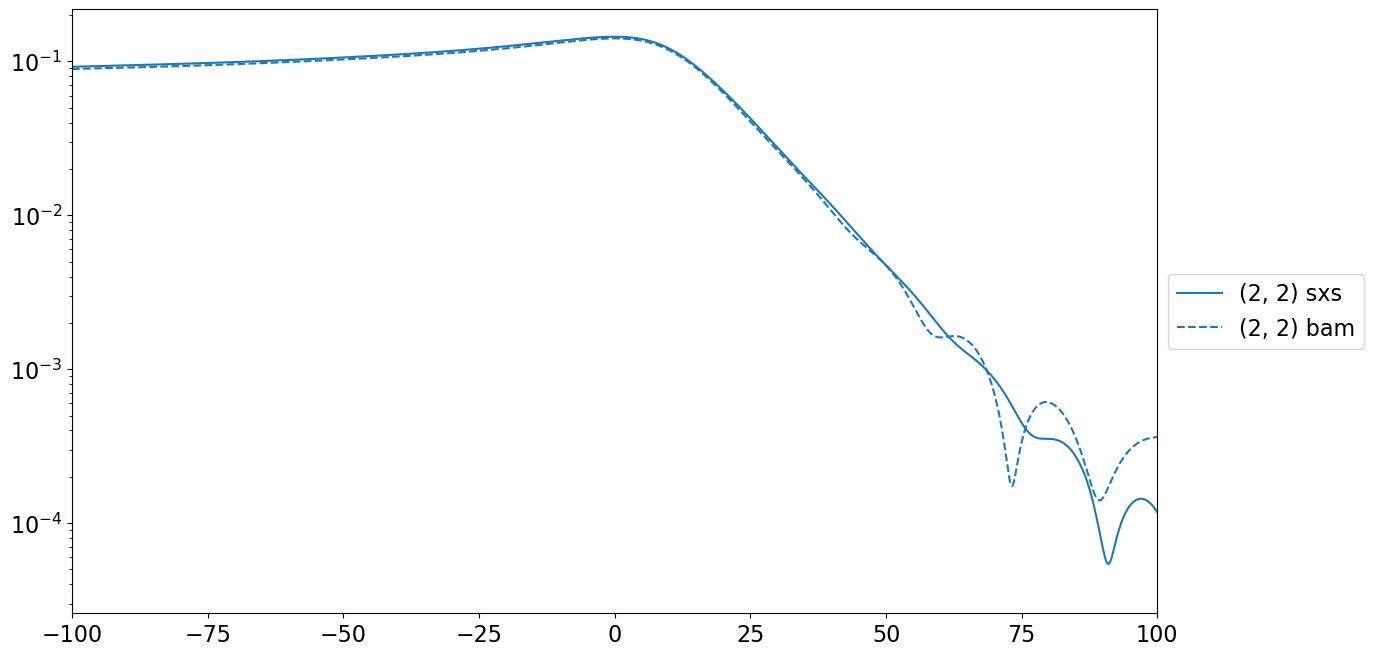

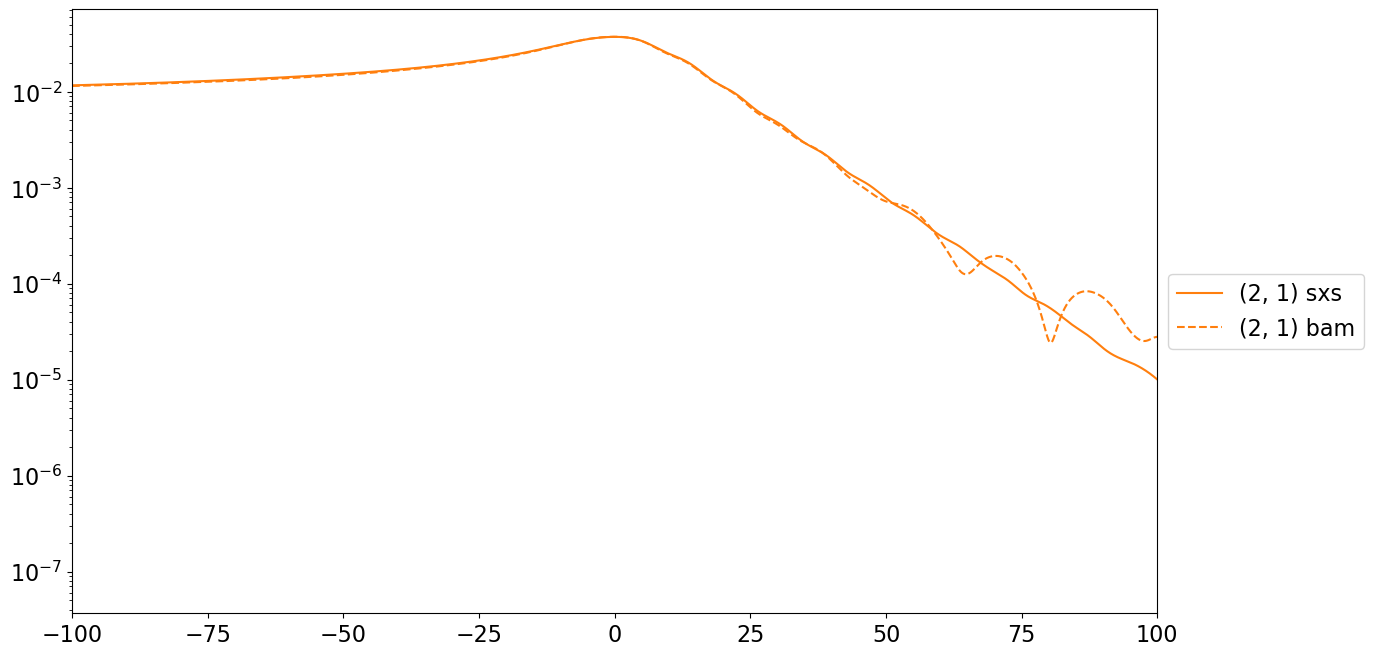

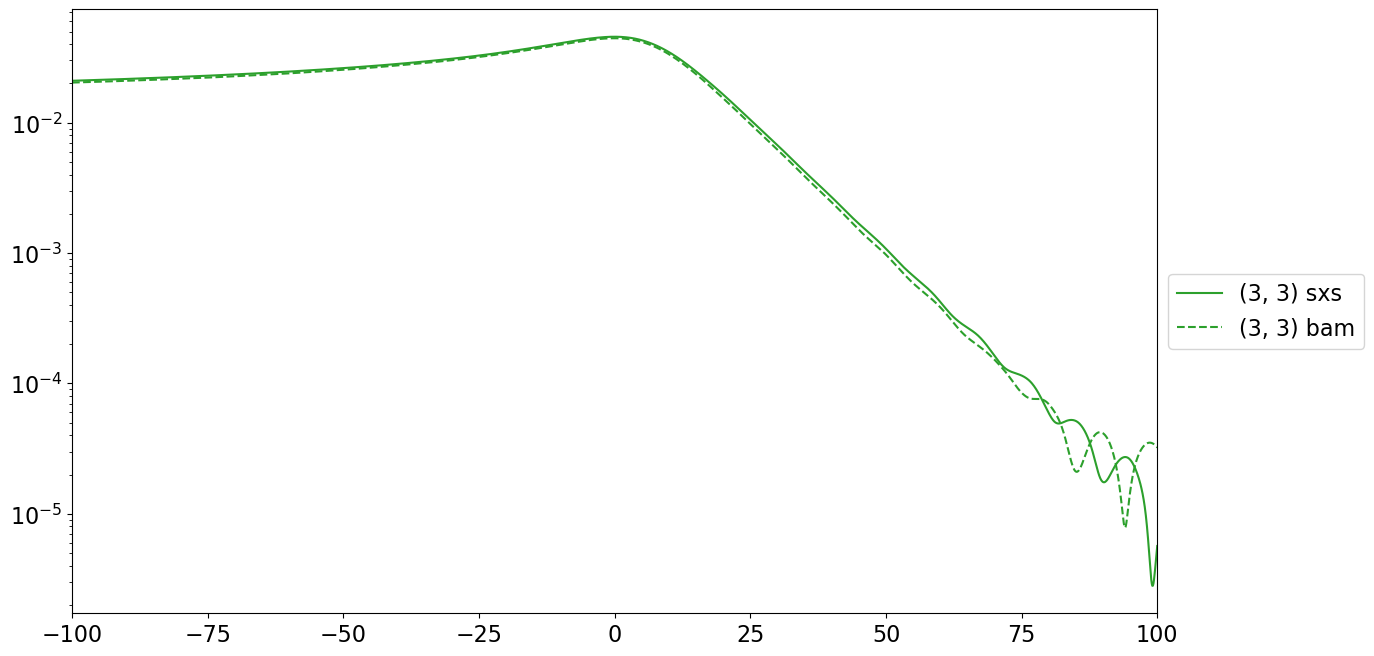

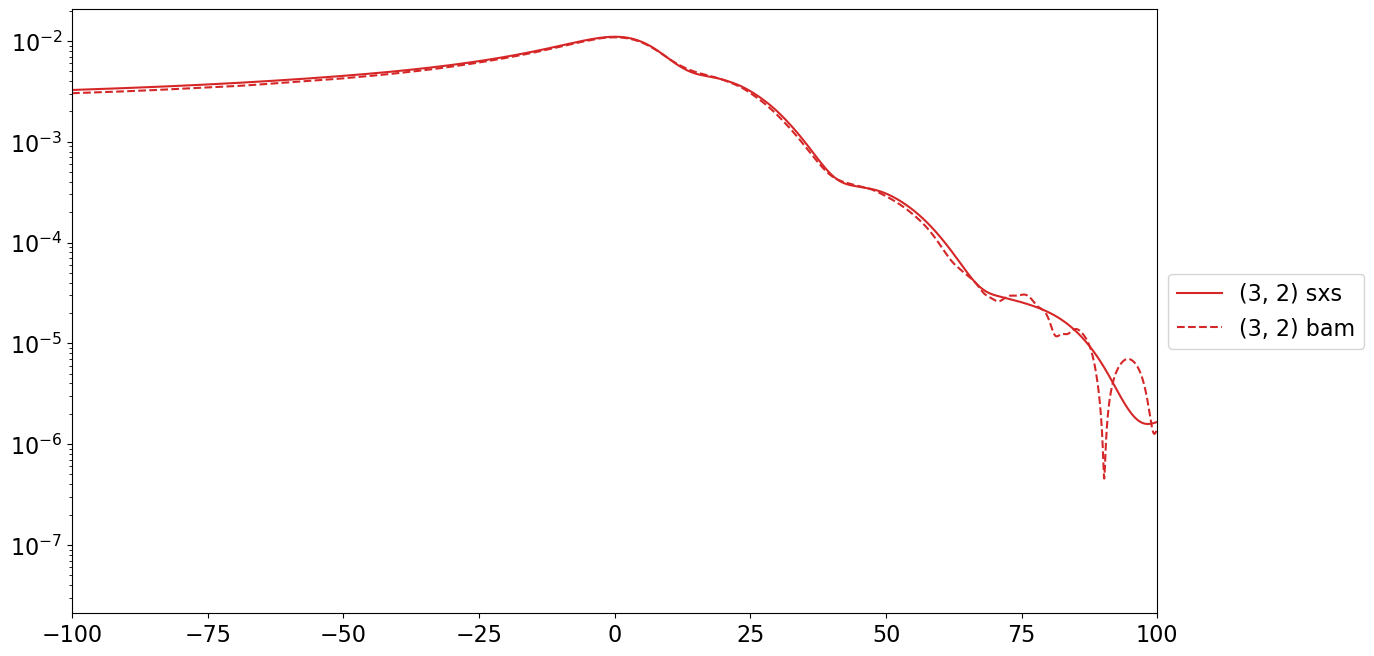

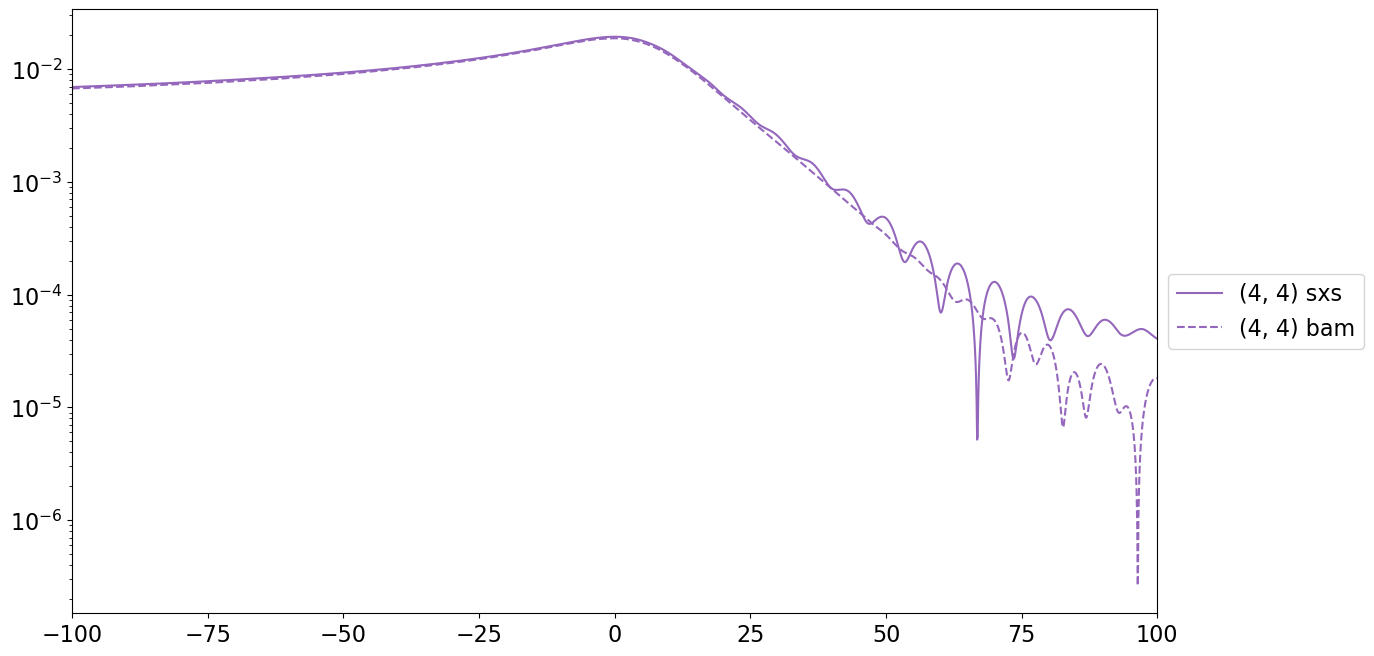

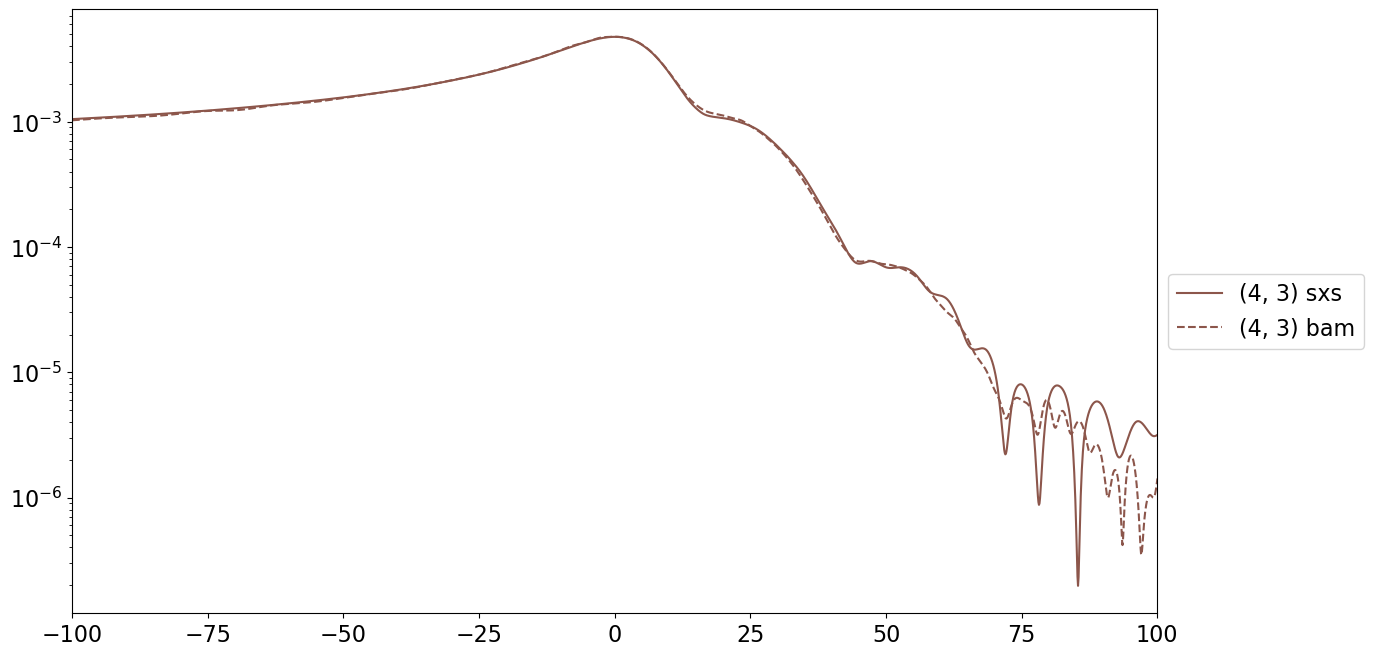

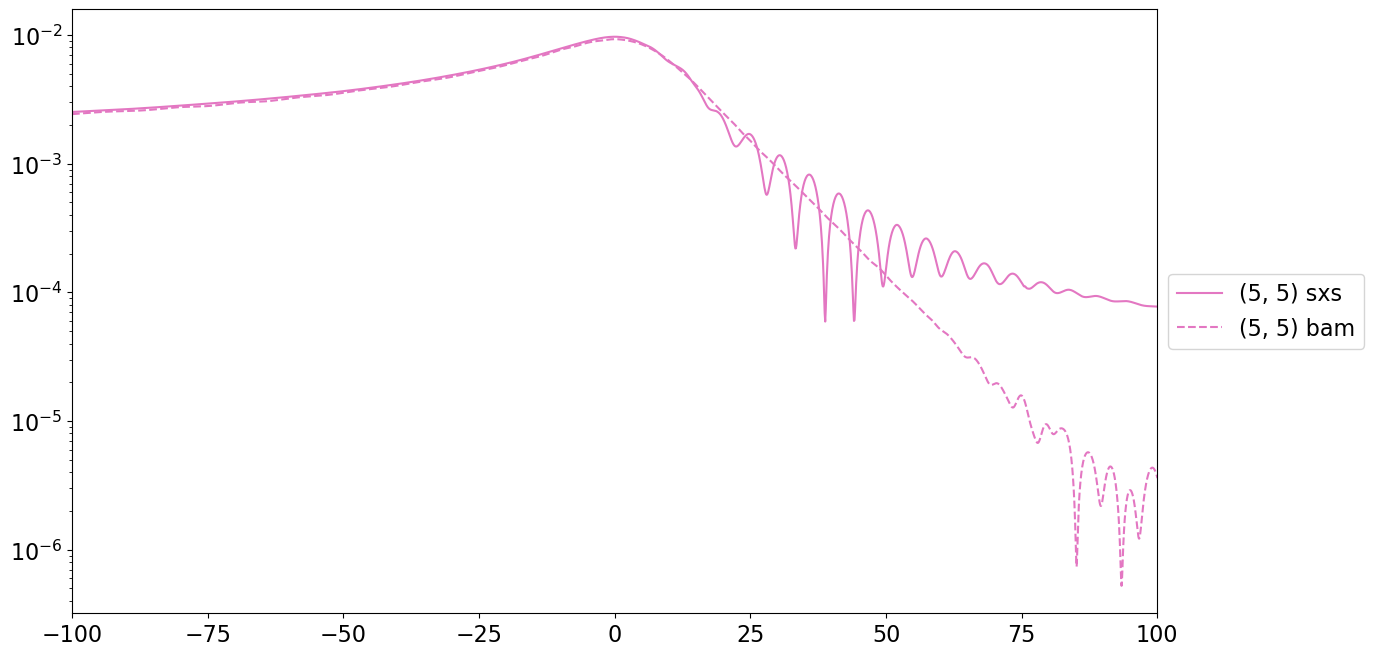

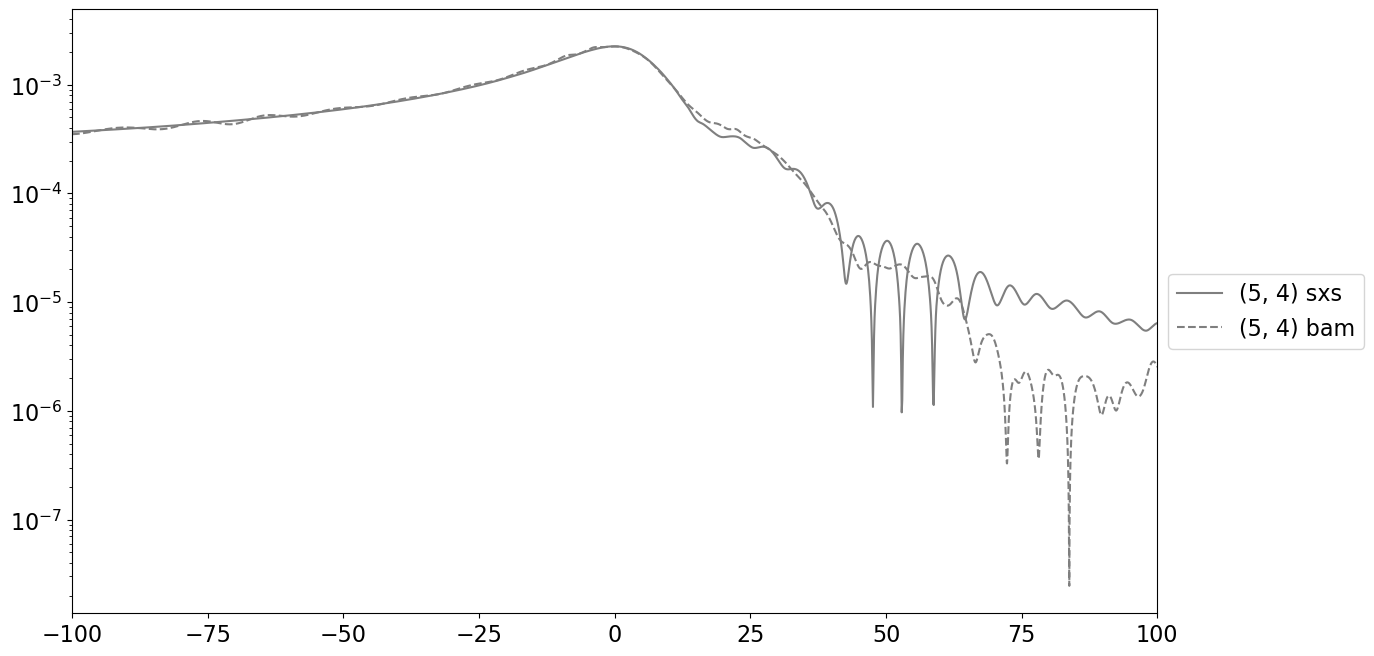

In [93]:

for i, (l,m) in enumerate(lms):
    plt.figure(figsize=(14, 8), dpi=100)

    # max_t = nrls['SXS_BBH_0063_Res5'][l,m].times[np.argmax(np.abs(h_to_psi4(nrls['SXS_BBH_0063_Res5'][l,m].times, nrls['SXS_BBH_0063_Res5'][l,m].strain)))]
    # plt.plot(nrls['SXS_BBH_0063_Res5'][l,m].times-max_t, np.abs(h_to_psi4(nrls['SXS_BBH_0063_Res5'][l,m].times, nrls['SXS_BBH_0063_Res5'][l,m].strain)), label=f'{l,m} sxs', c=f"C{i}")

    max_t = nrls['SXS_BBH_0063_Res5'][l,m].times[np.argmax(np.abs(nrls['SXS_BBH_0063_Res5'][l,m].strain))]
    plt.plot(nrls['SXS_BBH_0063_Res5'][l,m].times-max_t, np.abs(np.abs(nrls['SXS_BBH_0063_Res5'][l,m].strain)), label=f'{l,m} sxs', c=f"C{i}")

    idx_when = np.where(p0[l,m]['t'] > 200)[0][0]
    
    max_t = p0[l,m]['t'][idx_when:][np.argmax(np.abs(p0[l,m][l,m][idx_when:]))]

    plt.plot(p0[l,m]['t']-max_t, np.abs(p0[l,m][l,m]), label=f'{l,m} bam', c=f"C{i}", ls='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim(-100, 100)
    plt.yscale('log')
    # plt.axvline(0)
    plt.show()
    plt.close()